In [58]:
import cv2                 # working with, mainly resizing, images
import numpy as np         # dealing with arrays
import os                  # dealing with directories
from random import shuffle # mixing up or currently ordered data that might lead our network astray in training.
from tqdm import tqdm      # a nice pretty percentage bar for tasks. Thanks to viewer Daniel Bühler for this suggestion

TRAIN_DIR = "C:/Users/arman/Desktop/Animals/Train"
TEST_DIR = "C:/Users/arman/Desktop/Animals/Test"




In [59]:
def label_img(img):
    word_label = img.split('.')[-3]
    # conversion to one-hot array [cat,dog]
    #                            [much cat, no dog]
    if word_label == 'cat': return [1,0]
    #                             [no cat, very doggo]
    elif word_label == 'dog': return [0,1]

In [60]:
def create_train_data():
    training_data = []
    for img in tqdm(os.listdir(TRAIN_DIR)):
      
        label = label_img(img)
        path = os.path.join(TRAIN_DIR,img)
        img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (64,64))
        training_data.append([np.array(img),np.array(label)])
    shuffle(training_data)
    np.save('train_data.npy', training_data)
    return training_data

def process_test_data():
    testing_data = []
    for img in tqdm(os.listdir(TEST_DIR)):
        path = os.path.join(TEST_DIR,img)
        img_num = img.split('.')[0]
        img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (64,64))
        testing_data.append([np.array(img), img_num])
        
    shuffle(testing_data)
    np.save('test_data.npy', testing_data)
    return testing_data

In [61]:
from keras.models import Sequential
from keras.layers import *
from keras.optimizers import *

In [62]:
training_images = create_train_data()
testing_images = process_test_data()
# If you have already created the dataset:
#train_data = np.load('train_data.npy')

tr_img_data = np.array([i[0] for i in training_images]).reshape(-1,64,64,1)
tr_lbl_data = np.array([i[1] for i in training_images])

tst_img_data = np.array([i[0] for i in testing_images]).reshape(-1,64,64,1)
tst_lbl_data = np.array([i[1] for i in testing_images])

100%|██████████| 50/50 [00:00<00:00, 464.70it/s]


In [63]:
model = Sequential()

model.add(InputLayer(input_shape=[64,64,1]))
model.add(Conv2D(filters=32, kernel_size=5,strides=1, padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=5,padding='same'))

model.add(Conv2D(filters=50,kernel_size=5,strides=1,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=5,padding='same'))

model.add(Conv2D(filters=80,kernel_size=5,strides=1,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=5,padding='same'))

model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(2,activation='softmax'))
optimizer = Adam(lr=1e-3)

model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(x=tr_img_data,y=tr_lbl_data,epochs=50,batch_size=100)
model.summary()

Epoch 1/50
200/200 [==============================] - ETA: 1s - loss: 6.6959 - acc: 0.490 - 2s 10ms/step - loss: 6.3640 - acc: 0.4850
Epoch 2/50
200/200 [==============================] - ETA: 0s - loss: 6.6367 - acc: 0.550 - 1s 5ms/step - loss: 7.5301 - acc: 0.5050
Epoch 3/50
200/200 [==============================] - ETA: 0s - loss: 7.6872 - acc: 0.510 - 1s 5ms/step - loss: 7.7383 - acc: 0.5000
Epoch 4/50
200/200 [==============================] - ETA: 0s - loss: 6.6658 - acc: 0.500 - 1s 5ms/step - loss: 6.6183 - acc: 0.4850
Epoch 5/50
200/200 [==============================] - ETA: 0s - loss: 5.4435 - acc: 0.500 - 1s 5ms/step - loss: 5.1906 - acc: 0.5150
Epoch 6/50
200/200 [==============================] - ETA: 0s - loss: 4.2073 - acc: 0.490 - 1s 5ms/step - loss: 4.5591 - acc: 0.4700
Epoch 7/50
200/200 [==============================] - ETA: 0s - loss: 2.6785 - acc: 0.550 - 1s 5ms/step - loss: 2.8729 - acc: 0.5300
Epoch 8/50
200/200 [==============================] - ETA: 0s - loss

_________________________________________________________________
dense_10 (Dense)             (None, 2)                 1026      
Total params: 183,460
Trainable params: 183,460
Non-trainable params: 0
_________________________________________________________________


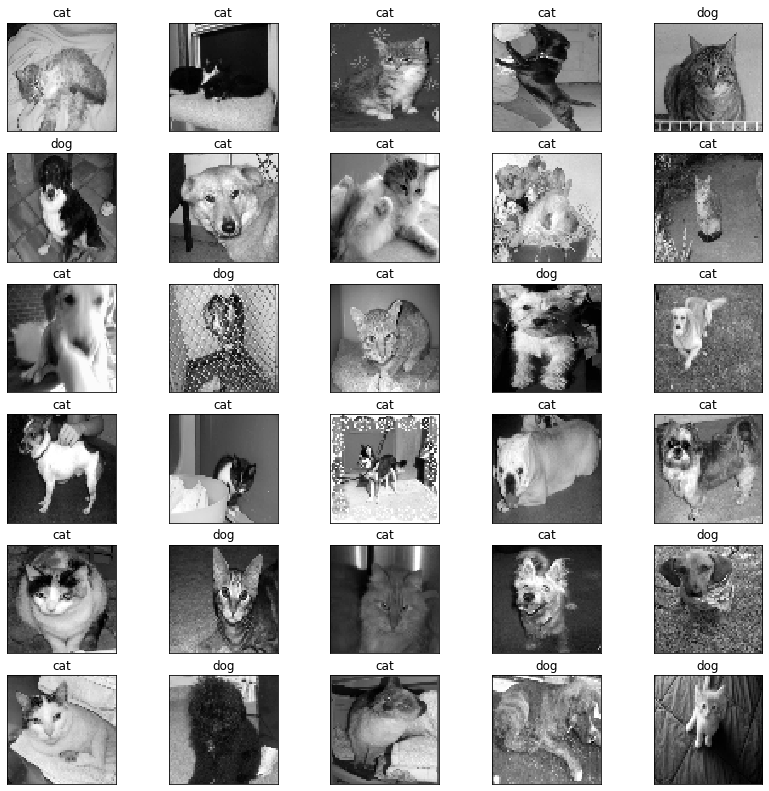

In [64]:
fig=plt.figure(figsize=(14, 14))

for cnt, data in enumerate(testing_images[10:40]):
    y = fig.add_subplot(6, 5, cnt+1)
    img = data[0]
    data = img.reshape(1,64, 64,1)
    model_out = model.predict([data])
    
    if np.argmax(model_out) == 1:
        str_label='dog'
    else:
        str_label='cat'
        
    y.imshow(img,cmap='gray')
    plt.title(str_label)
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False) 